# 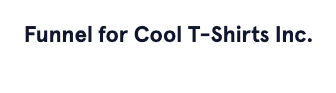

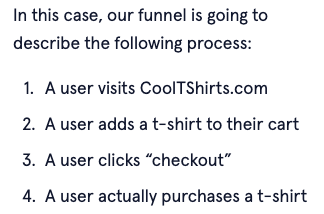

In [14]:
import pandas as pd

visits = pd.read_csv('visits.csv', parse_dates=[1])
cart = pd.read_csv('cart.csv', parse_dates=[1])
checkout = pd.read_csv('checkout.csv', parse_dates=[1])
purchase = pd.read_csv('purchase.csv', parse_dates=[1])

In [5]:
visits.head()

,user_id,visit_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00


In [7]:
cart.head()

,user_id,cart_time
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27 01:35:00
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04 10:38:00
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27 08:22:00
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26 15:48:00


In [8]:
checkout.head()

,user_id,checkout_time
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00
1,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07 20:11:00
2,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13 11:38:00
3,89fe330a-8966-4756-8f7c-3bdbcd47279a,2017-04-20 16:15:00
4,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:52:00


In [9]:
purchase.head()

,user_id,purchase_time
0,4b44ace4-2721-47a0-b24b-15fbfa2abf85,2017-05-11 04:25:00
1,02e684ae-a448-408f-a9ff-dcb4a5c99aac,2017-09-05 08:45:00
2,4b4bc391-749e-4b90-ab8f-4f6e3c84d6dc,2017-11-20 20:49:00
3,a5dbb25f-3c36-4103-9030-9f7c6241cd8d,2017-01-22 15:18:00
4,46a3186d-7f5a-4ab9-87af-84d05bfd4867,2017-06-11 11:32:00


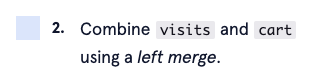

In [12]:
visits.merge(cart, "left", on="user_id").head()

,user_id,visit_time,cart_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaT
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaT
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaT


In [16]:
len(visits.merge(cart, "left", on="user_id"))

2000

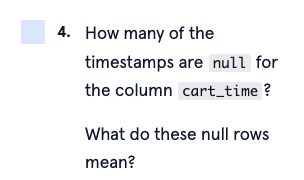

In [2]:
visit_cart=visits.merge(cart, "left", on="user_id")

In [3]:
len(visit_cart[visit_cart.cart_time.isnull() == True])

1652

meaning of null rows:
2000 - 1652 = 348 of 2000 page visits resulted in the visitor putting a product in his cart

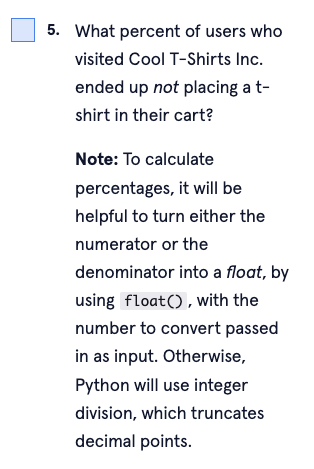

In [7]:
all_visits = len(visits.merge(cart, "left", on="user_id"))
visits_nocart = len(visit_cart[visit_cart.cart_time.isnull() == True])

In [10]:
visits_nocart/all_visits # 82.6 percent of visitors of the site that have not put a shirt in their cart

0.826

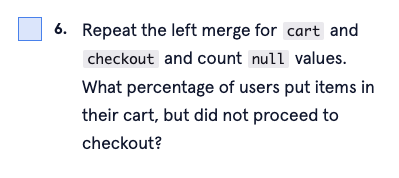

In [18]:
carts_checkout = cart.merge(checkout, "left", on="user_id")

In [19]:
carts_checkout.head()

,user_id,cart_time,checkout_time
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00,2017-11-07 21:14:00
1,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00,2017-11-07 20:50:00
2,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00,2017-11-07 21:11:00
3,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27 01:35:00,NaT
4,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04 10:38:00,2017-03-04 11:04:00


In [82]:
nbr_total_carts = len(carts_checkout) #nbr of users that put items in the cart
nbr_total_carts

482

In [32]:
carts_checkout[carts_checkout.checkout_time.isnull()==True]

,user_id,cart_time,checkout_time
3,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27 01:35:00,NaT
6,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26 15:48:00,NaT
14,fd80ce93-ae6e-4c0b-9ea4-561f84152026,2017-06-07 01:18:00,NaT
26,48a23075-694b-417d-8449-9df921ad95aa,2017-07-09 15:28:00,NaT
29,5d7d121a-817c-4b84-b4d6-5388092b9aec,2017-06-10 14:54:00,NaT
...,...,...,...
469,e1a8574d-1975-4c6a-8020-b3469e4995a5,2017-10-01 20:43:00,NaT
471,49d04162-a920-4823-a1f0-9764768c19d1,2017-10-10 10:55:00,NaT
472,bf63c84b-53b7-45f6-9dc5-723087c31c1a,2017-04-12 01:34:00,NaT
477,59d2b685-383a-4fce-a325-35d985713a8b,2017-01-20 03:58:00,NaT


In [37]:
nbr_total_checkouts = len(carts_checkout[carts_checkout.checkout_time.isnull()==True])
nbr_total_checkouts

122

In [39]:
nbr_total_checkouts/nbr_total_carts # 25% of items that were put in the cart were also checked out to proceed for payment

0.25311203319502074

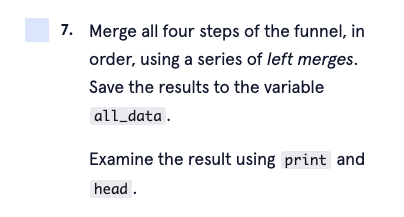

In [40]:
visits_cart = visits.merge(cart, "left", on="user_id")

In [41]:
visits_cart_checkout = visits_cart.merge(checkout, "left", on="user_id")

In [42]:
all_data = visits_cart_checkout.merge(purchase, "left", on="user_id")

In [43]:
all_data.head()

,user_id,visit_time,cart_time,checkout_time,purchase_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaT,NaT,NaT
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00,NaT,NaT
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaT,NaT,NaT
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaT,NaT,NaT


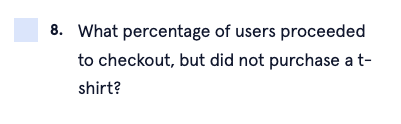

In [65]:
cart_select= (all_data.visit_time.isnull() == False) & (all_data.cart_time.isnull() == False) & (all_data.checkout_time.isnull() == False)

In [68]:
nbr_checked_out=len(all_data[cart_select])
nbr_checked_out

598

In [64]:
cart_nopurchase_select= (all_data.visit_time.isnull() == False) & (all_data.cart_time.isnull() == False) & (all_data.checkout_time.isnull() == False) & (all_data.purchase_time.isnull() == True)

In [70]:
nbr_cart_nopurchase = len(all_data[cart_nopurchase_select])
nbr_cart_nopurchase

101

In [72]:
nbr_cart_nopurchase/nbr_checked_out #16.9% of users that had an item in their cart did not proceed purchasing the item ultimately; this means that a majority of carted items get ultimately purchased 

0.1688963210702341

In [81]:
len(all_data[(all_data.checkout_time.isnull() == False)])

598

In [100]:
nbr_purchases = len(all_data[(all_data.purchase_time.isnull() == False)])
nbr_purchases

497

In [102]:
nbr_visitors = len(all_data.visit_time.isnull() == False)
nbr_visitors

2372

In [103]:
nbr_purchases/nbr_visitors #20.9% of visitors purchase an item 

0.20952782462057334

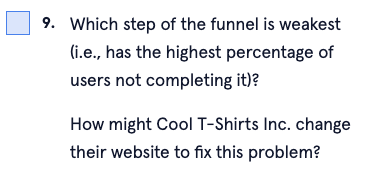

Loss rates as follows:

#83% of users that visit the site do not put an item in the cart
#75% of users that have put an item in the cart do not proceed to the checkout
#17% of users that proceed to the checkout do not conclude the transaction 
#Recommendation: investigate customer journey pain points to improve step 1 and step 2

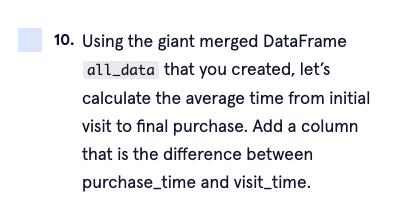

In [86]:
all_data

,user_id,visit_time,cart_time,checkout_time,purchase_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaT,NaT,NaT
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00,NaT,NaT
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaT,NaT,NaT
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaT,NaT,NaT
...,...,...,...,...,...
2367,33913ac2-03da-45ae-8fc3-fea39df827c6,2017-03-25 03:29:00,NaT,NaT,NaT
2368,4f850132-b99d-4623-80e6-6e61d003577e,2017-01-08 09:57:00,NaT,NaT,NaT
2369,f0830b9b-1f5c-4e74-b63d-3f847cc6ce70,2017-09-07 12:56:00,NaT,NaT,NaT
2370,b01bffa7-63ba-4cd3-9d93-eb1477c23831,2017-07-20 04:37:00,NaT,NaT,NaT


In [94]:
all_data["time_to_purchase"] = all_data.visit_time - all_data.purchase_time

In [96]:
all_data.time_to_purchase.mean() #this means that on avg it takes 44minutes for a visitor to purchase an item of the 20.9% of the visitors that made a purchase

Timedelta('-1 days +23:16:06.639839035')

# 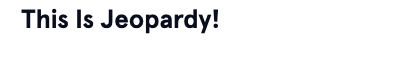

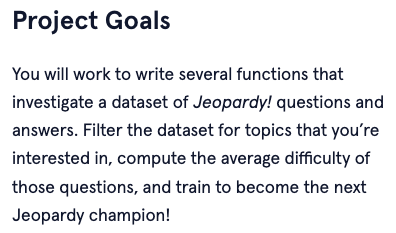

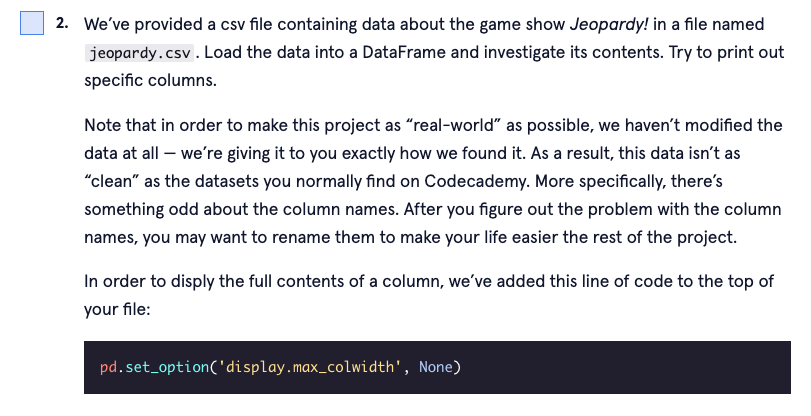

In [110]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

jeopardy = pd.read_csv('jeopardy.csv',parse_dates=[1])


In [111]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


In [120]:
sub = jeopardy.head()

In [150]:
jeopardy.columns = jeopardy.columns.str.replace(' ', '')
jeopardy["Answer"].head()

0    Copernicus
1    Jim Thorpe
2       Arizona
3    McDonald's
4    John Adams
Name: Answer, dtype: object

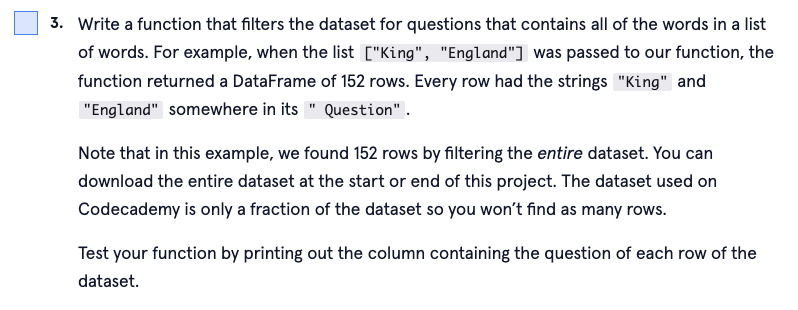